# Import Libraries

In [10]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns 
import matplotlib.pyplot as plt

# Synthetic Data Generation

In [3]:
warnings.filterwarnings("ignore")
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)


# Splitting data as features and target

In [4]:
x = df.drop('EnergyEfficiency',axis = 1)
y = df['EnergyEfficiency']


# Visualization of relationship between features and target 

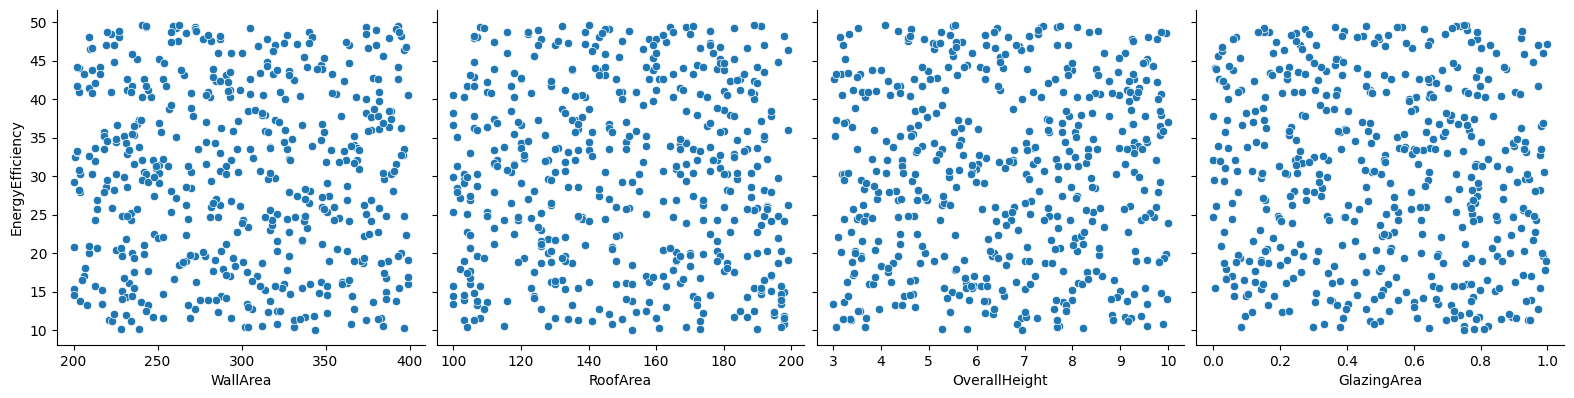

In [5]:
sns.pairplot(df,x_vars=["WallArea", "RoofArea",'OverallHeight','GlazingArea'], y_vars=['EnergyEfficiency'], height=4, aspect=1, kind="scatter")

# Data Splitting as train and test

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

# Choosing a model and training it

In [48]:
model = RandomForestRegressor( n_estimators=250,       # Number of trees in the forest
    max_depth=1,           # Max depth of each tree
    min_samples_split=4,    # Minimum samples to split a node
    min_samples_leaf=2,     # Minimum samples per leaf
    random_state=42  )
model.fit(x_train,y_train)

,n_estimators,250
,criterion,'squared_error'
,max_depth,1
,min_samples_split,4
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Model Predictions

In [49]:
predictions = model.predict(x_test)

# Model Evaluation with MSE

In [50]:
mse = mean_squared_error(y_test,predictions)
print("MSE = ",mse)

MSE =  129.58263901079283


# Plot True Values Vs Predicted Ones

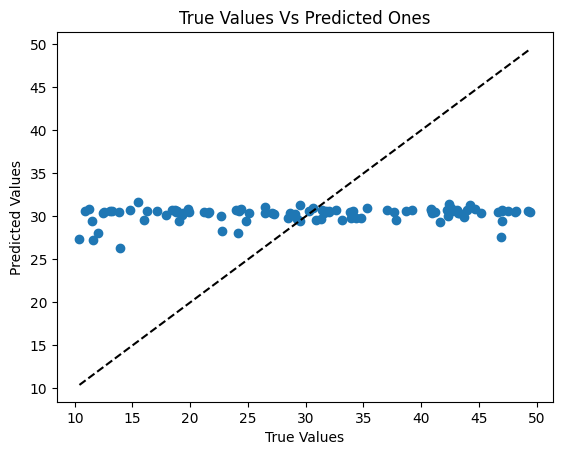

In [51]:
plt.Figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values Vs Predicted Ones")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()